##### 1. Setup working directory and path to study area

In [1]:
%cd /home/WUR/duku002/Scripts/drought_floods/vscode


/home/WUR/duku002/Scripts/drought_floods/vscode


In [2]:
working_dir='/lustre/backup/WUR/ESG/duku002/Drought-Flood-Cascade/brazil_multi_basins'
study_area='/home/WUR/duku002/Scripts/NBAT/hydro/common_data/brazil_multi_basins.shp'

##### 2 .Download and preprocess input data

In [ ]:

# download and preprocess MODIS vegetation continuous fields from Google Earth Engine Data catalog

from bakaano.tree_cover import TreeCover
vf = TreeCover(
    working_dir=working_dir, 
    study_area=study_area, 
    start_date='2001-01-01', 
    end_date='2020-12-31'
)
vf.get_tree_cover_data()
vf.plot_tree_cover(variable='tree_cover') # options for plot are 'tree_cover' and 'herb_cover'

In [ ]:
# download and preprocess MODIS NDVI data from Google Earth Engine Data catalog

from bakaano.ndvi import NDVI
nd = NDVI(
    working_dir=working_dir, 
    study_area=study_area, 
    start_date='2001-01-01', 
    end_date='2010-12-31'
)
nd.get_ndvi_data()
nd.plot_ndvi(interval_num=10)  # because NDVI is in 16-day interval the 'interval_num' represents a 16-day period. 
                               #Hence 0 is the first 16 day period

In [ ]:
# Get elevation data

from bakaano.dem import DEM
dd = DEM(
    working_dir=working_dir, 
    study_area=study_area, 
    local_data=False, 
    local_data_path=None
)
dd.get_dem_data()
dd.plot_dem()

In [ ]:
# Get soil data

from bakaano.soil import Soil
sgd = Soil(
    working_dir=working_dir, 
    study_area=study_area
)
sgd.get_soil_data()
sgd.plot_soil(variable='wilting_point')  #options are 'wilting_point', 'saturation_point' and 'available_water_content'

In [ ]:
#  Get alpha earth satellite embedding dataset

from bakaano.alpha_earth import AlphaEarth
dd = AlphaEarth(
    working_dir=working_dir, 
    study_area=study_area,
    start_date='2013-01-01', 
    end_date = '2024-01-01'
)
dd.get_alpha_earth()
dd.plot_alpha_earth('A35') #Band options are A00 to A63

In [ ]:
#get meteo

from bakaano.meteo import Meteo
cd = Meteo(
    working_dir=working_dir, 
    study_area=study_area, 
    start_date='2001-01-01', 
    end_date='2010-12-31',
    local_data=False, 
    data_source='ERA5'
)
cd.plot_meteo(variable='tasmin', date='2006-12-01') # variable options are 'tmean', 'precip', 'tasmax', 'tasmin'

#####   3. Computing runoff and routing to river network

In [ ]:

from bakaano.veget import VegET
vg = VegET(
    working_dir=working_dir, 
    study_area=study_area,
    start_date='2001-01-01', 
    end_date='2010-12-31',
    climate_data_source='ERA5',
    routing_method='mfd'
)
vg.compute_veget_runoff_route_flow()

In [3]:
#visualize routed runoff data

from bakaano.plot_runoff import RoutedRunoff
rr = RoutedRunoff(
    working_dir=working_dir, 
    study_area=study_area
)
#rr.map_routed_runoff(date='2020-01-03', vmax=7) #output values have been log transformed for better visualization

Available station_ids:
3650150, 3650202, 3650205, 3650220, 3650221, 3650250, 3650270, 3650280, 3650285, 3650310, 3650320, 3650321, 3650330, 3650335, 3650340, 3650341, 3650350, 3650355, 3650359, 3650360, 3650370, 3650380, 3650385, 3650410, 3650415, 3650430, 3650450, 3650455, 3650460, 3650470, 3650471, 3650475, 3650477, 3650480, 3650481, 3650485, 3650488, 3650510, 3650511, 3650520, 3650525, 3650526, 3650530, 3650535, 3650540, 3650545, 3650610, 3650620, 3650630, 3650634, 3650635, 3650640, 3650645, 3650649, 3650650, 3650690, 3650710, 3650720, 3650730, 3650740, 3650745, 3650750, 3650755, 3650760, 3650765, 3650810, 3650811, 3650820, 3650840, 3650860, 3650870, 3650875, 3650880, 3650881, 3650885, 3650890, 3650910, 3650912, 3650920, 3650924, 3650925, 3650928, 3650930, 3650940, 3650941, 3650970, 3650990


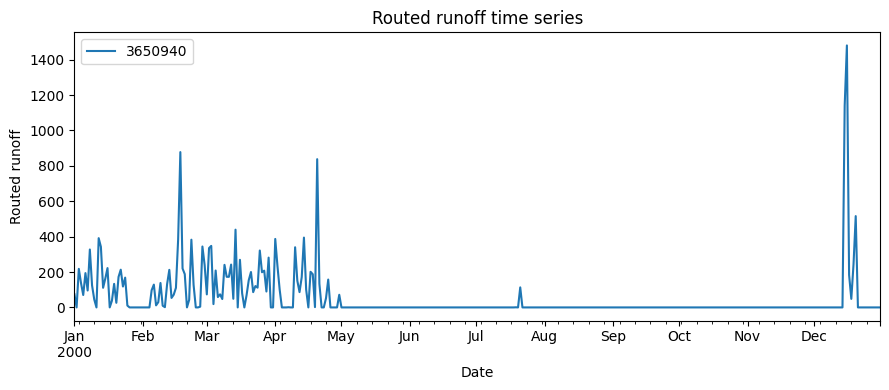

In [4]:
rr.interactive_plot_routed_runoff_timeseries(start_date='2000-01-01', end_date='2000-12-31', 
                                             grdc_netcdf='/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc'
                                 )

#####   4. Explore input data, river networks and hydrological stations interactively

In [ ]:
from bakaano.runner import BakaanoHydro
bk = BakaanoHydro(
    working_dir=working_dir, 
    study_area=study_area,
    climate_data_source='ERA5'
)
bk.explore_data_interactively('1981-01-01', '2016-12-31', '/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc')

#####   5. Training, Evaluating and Applying Bakaano-Hydro model 

In [ ]:
# INITIALIZE INSTANCE OF BAKAANO-HYDRO MODEL

from bakaano.runner import BakaanoHydro
bk = BakaanoHydro(  
    working_dir=working_dir, 
    study_area=study_area,
    climate_data_source='ERA5'
)

In [ ]:
# TRAINING BAKAANO-HYDRO MODEL

# The model is trained using the GRDC streamflow data.
# Note: The training process is computationally expensive and may take a long time to complete.
# trained model is always in the models folder in the working_dir and with a .keras extension


bk.train_streamflow_model(
    train_start='1981-01-01', 
    train_end='2020-12-31', 
    grdc_netcdf='/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc', 
    batch_size=32, 
    num_epochs=300,
    learning_rate=0.001  #for fewer stations reduce learning rate to 0.0001
)

#####   5c. Optional: Evaluate/Simulate with observed CSV files
Use the same lookup table and station CSV directory as training.


In [ ]:
# Evaluate interactively using CSV observations (enter station id when prompted)
model_path = f'{working_dir}/models/bakaano_model.keras'

bk.evaluate_streamflow_model_interactively(
    model_path=model_path,
    val_start='2001-01-01',
    val_end='2010-12-31',
    grdc_netcdf=None,
    csv_dir='/path/to/observed_csvs',
    lookup_csv='/path/to/station_lookup.csv'
)

# Batch prediction for stations listed in lookup CSV
bk.simulate_grdc_stations(
    model_path=model_path,
    sim_start='1981-01-01',
    sim_end='2020-12-31',
    grdc_netcdf=None,
    csv_dir='/path/to/observed_csvs',
    lookup_csv='/path/to/station_lookup.csv'
)


In [ ]:
# EVALUATING THE TRAINED MODEL INTERACTIVELY

# The model is evaluated using the GRDC streamflow data.


# trained model is always in the models folder in the working_dir and with a .keras extension
# the model names is always in the format: bakaano_model_<loss_fn>_<num_input_branch>_branches.keras
model_path = f'{working_dir}/models/bakaano_model.keras' 

bk.evaluate_streamflow_model_interactively(
    model_path=model_path, 
    val_start='2001-01-01', 
    val_end='2010-12-31', 
    grdc_netcdf='/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc'
)

In [ ]:
# Batch prediction for GRDC stations

model_path = f'{working_dir}/models/bakaano_model.keras'

bk.simulate_grdc_stations(
    model_path=model_path, 
    sim_start='1981-01-01', 
    sim_end='2020-12-31', 
    grdc_netcdf='/lustre/backup/WUR/ESG/duku002/NBAT/hydro/input_data/GRDC-Daily-africa-south-america.nc'
)

In [ ]:
# PREDICTING STREAMFLOW USING THE TRAINED MODEL AND STORING AS CSV FILES 
# The model is used to predict streamflow in any location in the study area. 

model_path = f'{working_dir}/models/bakaano_model.keras'

bk.simulate_streamflow(
    model_path=model_path, 
    sim_start='1981-01-01', 
    sim_end='1990-12-31', 
    latlist=[13.8, 13.9],
    lonlist=[3.0, 4.0]
)
